Źródło danych: https://github.com/evelinag/StarWars-social-network/blob/master/networks/starwars-full-interactions.json

In [1]:
import requests
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
url = "https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-full-interactions.json"
response = requests.get(url)
data = json.loads(response.text)
data.keys()

dict_keys(['nodes', 'links'])

In [3]:
starwars_nodes = pd.DataFrame(data['nodes']).reset_index(names='id')
starwars_nodes

,id,name,value,colour
0,0,QUI-GON,61,#4f4fb1
1,1,NUTE GUNRAY,24,#808080
2,2,PK-4,3,#808080
3,3,TC-14,4,#808080
4,4,OBI-WAN,147,#48D1CC
...,...,...,...,...
105,105,YOLO ZIFF,3,#808080
106,106,COLONEL DATOO,3,#808080
107,107,ELLO ASTY,4,#808080
108,108,JESS,4,#808080


In [4]:
starwars_edges = pd.DataFrame(data['links'])
starwars_edges.head()

,source,target,value
0,1,0,1
1,2,3,1
2,4,3,1
3,0,3,1
4,4,0,26


In [5]:
g = nx.from_pandas_edgelist(starwars_edges, source='source', target='target', edge_attr='value')

In [6]:
node_labels_dict = starwars_nodes.set_index("id")["name"].to_dict()
nx.relabel_nodes(g, node_labels_dict, copy=False) 

In [7]:
weights = np.array([e[2]["value"] for e in g.edges(data=True)])
max_weight = np.max(weights)

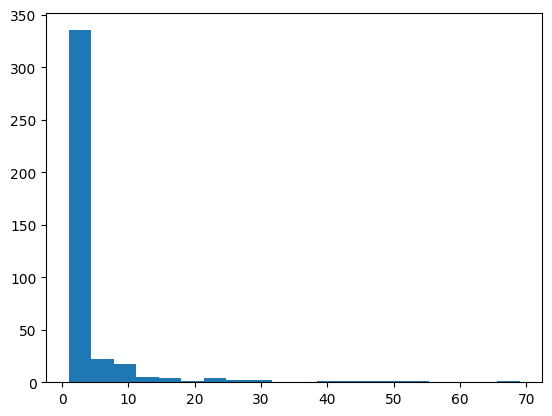

In [8]:
plt.hist(weights, bins=20)
plt.show()

In [9]:
node_degree = dict(g.degree(weight = "value"))
node_size = np.array([node_degree[n] for n in g.nodes()])

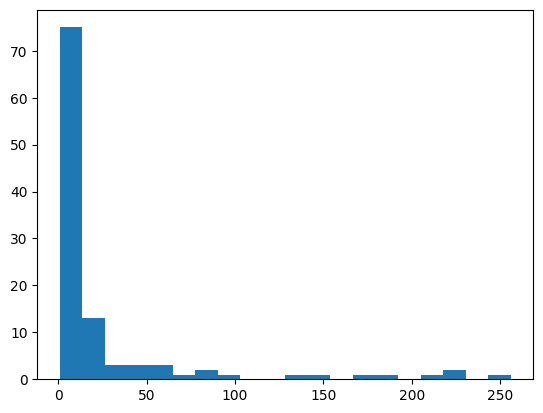

In [10]:
plt.hist(node_size, bins=20)
plt.show()

In [11]:
pos = nx.kamada_kawai_layout(g)

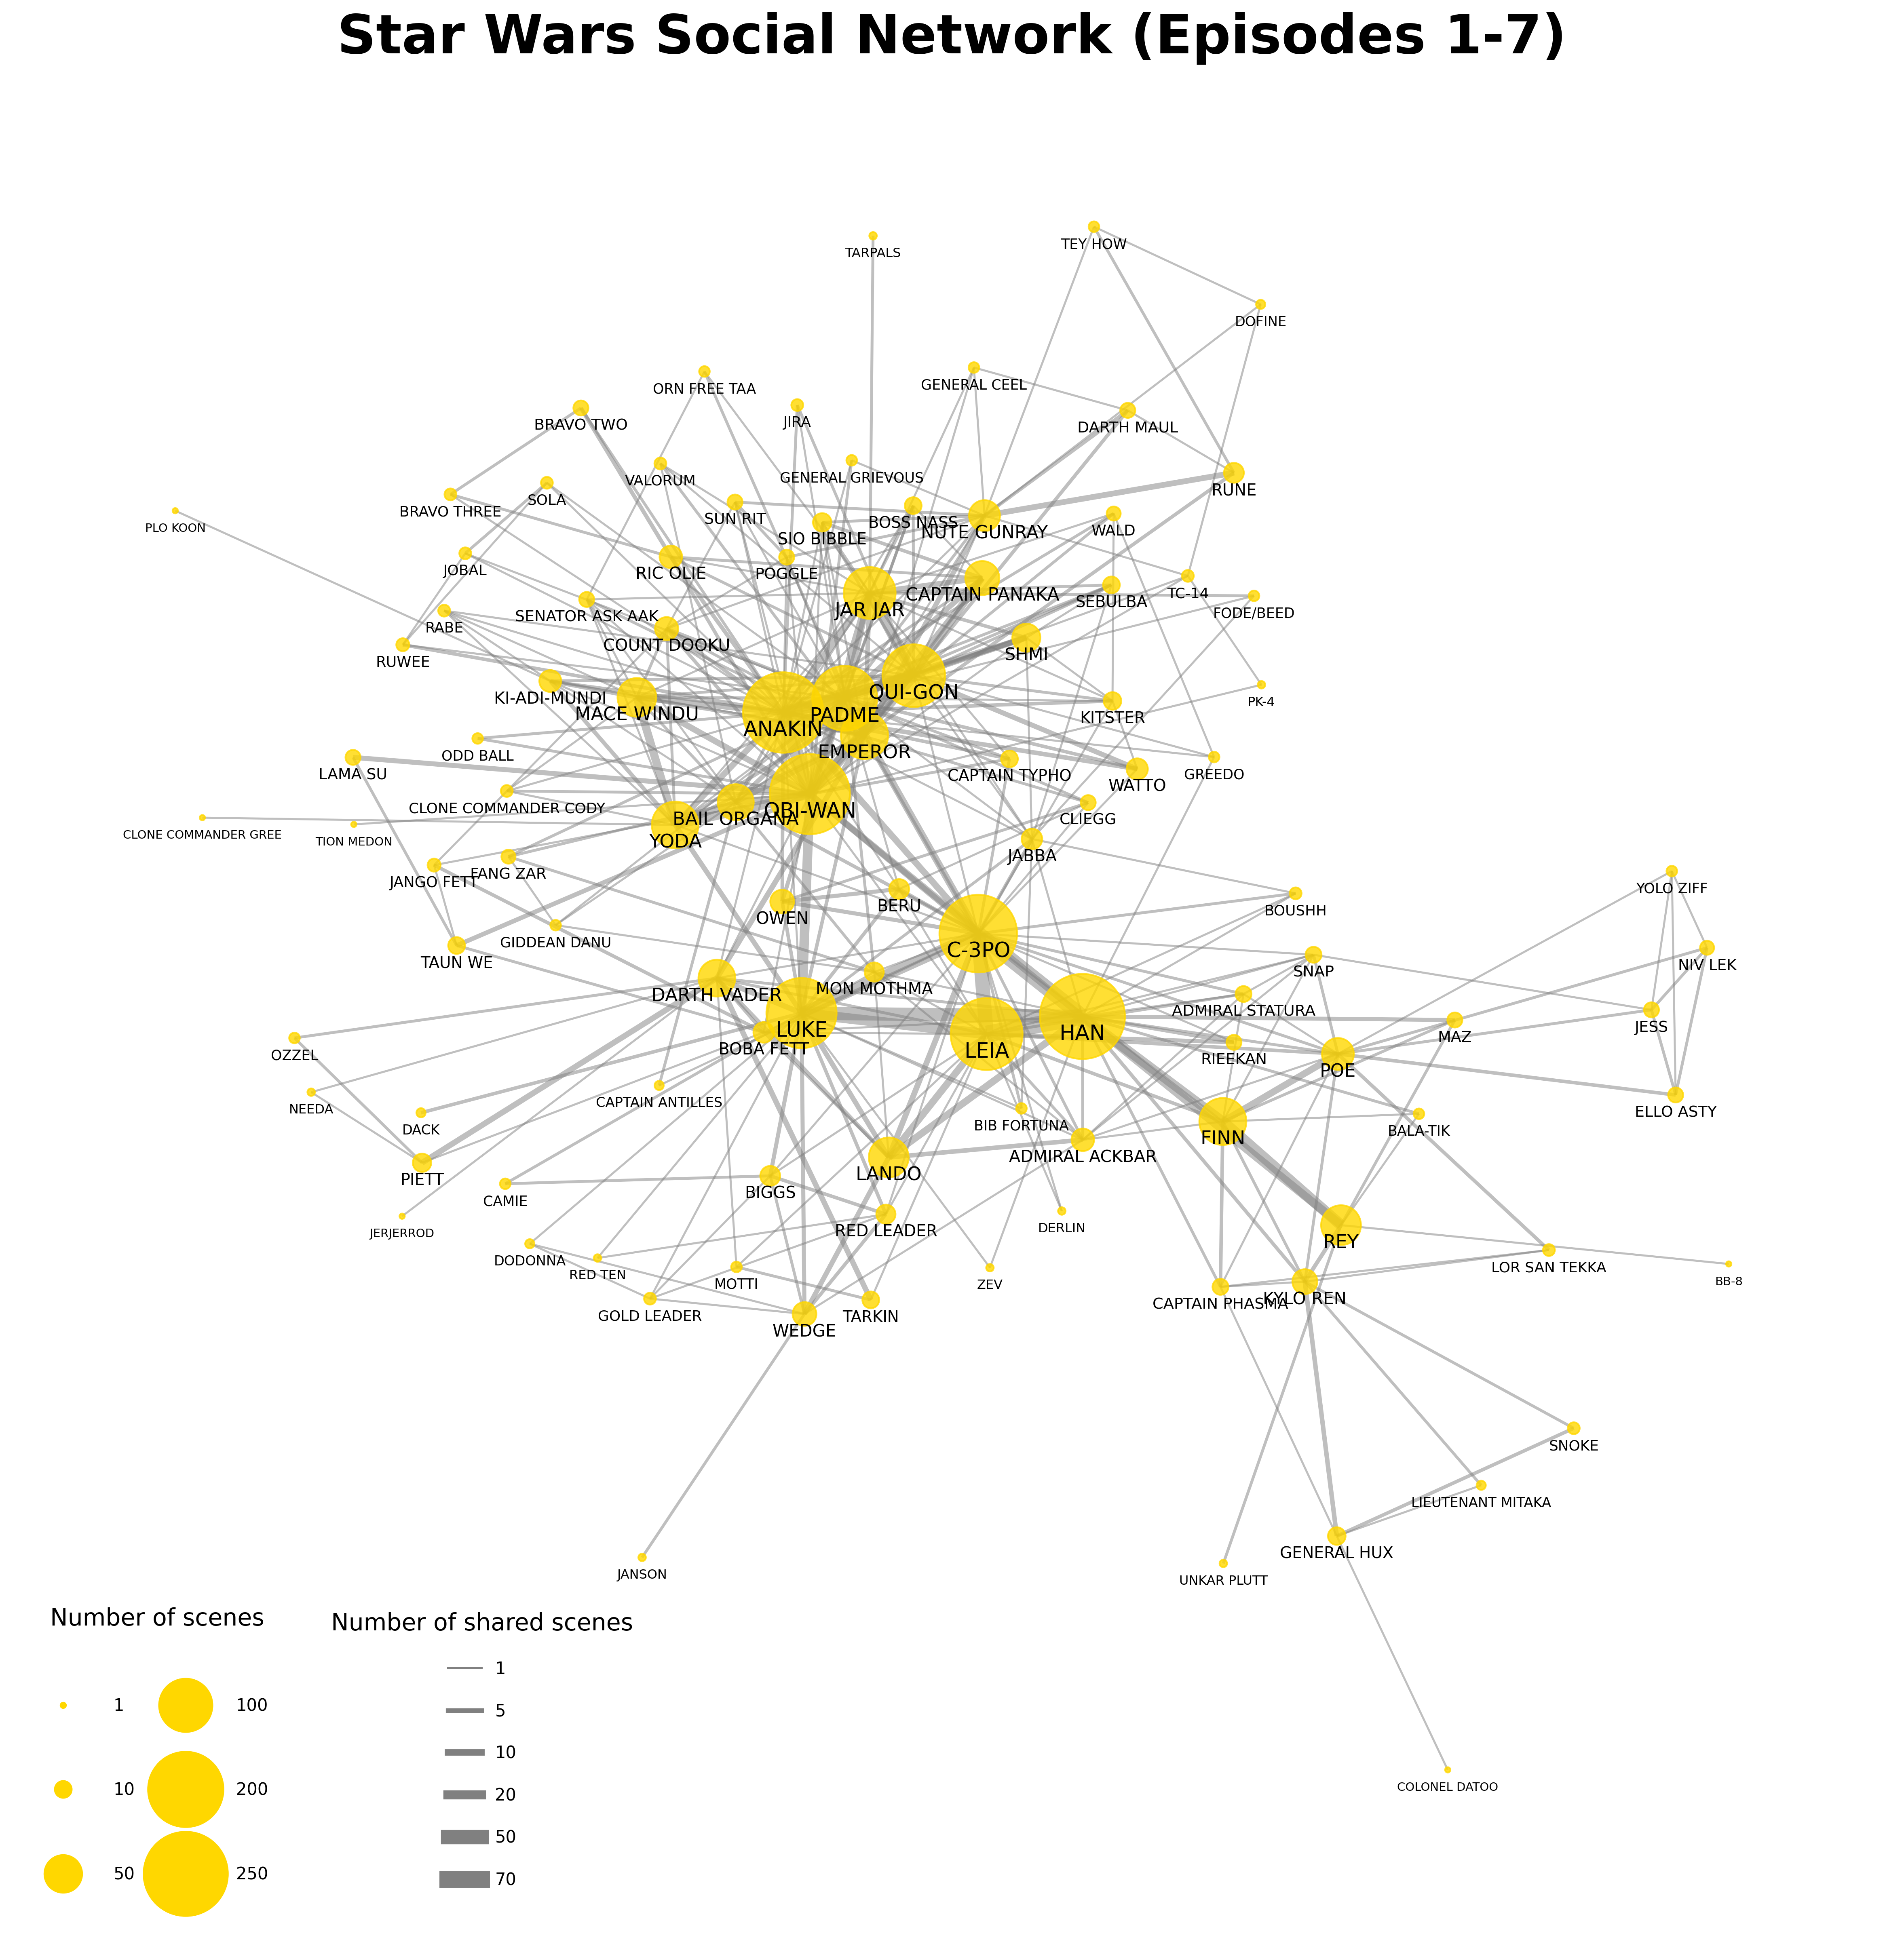

In [12]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)

ax.set_title("Star Wars Social Network (Episodes 1-7)",
             fontsize=32, weight='bold')

nx.draw_networkx_nodes(
    g, 
    pos=pos, 
    node_color='gold',
    alpha=0.8,
    node_size=node_size * 10,
    ax=ax
)

nx.draw_networkx_edges(
    g, 
    pos=pos, 
    edge_color='grey', 
    alpha=0.5,
    width=np.sqrt(weights / max_weight) * 10,
    ax=ax
)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y - 0.02, node, fontsize=7 + np.log(node_size[i]), ha="center", va="center")

for weight in [1, 5, 10, 20, 50, 70]:
    ax.plot([], [], color='grey', linewidth=np.sqrt(weight / max_weight) * 10, label=str(weight))

first_legend = ax.legend(
    title="Number of shared scenes", 
    title_fontsize=14,
    frameon=False, 
    bbox_to_anchor=(0.25, 0.015), 
    labelspacing=1.5,
    loc = "lower center" 
)
ax.add_artist(first_legend)

ax.legend(
    handles = [
        plt.Line2D(
            [], [], 
            color='gold', 
            marker='o', 
            markersize=np.sqrt(size * 10), 
            linestyle=''
        ) 
        for size in [1, 10, 50, 100, 200, 250]
    ],
    handletextpad=2,
    labels = [1, 10, 50, 100, 200, 250],
    title="Number of scenes", 
    title_fontsize=14,
    frameon=False,
    ncol = 2,
    labelspacing=4,
    bbox_to_anchor=(0.01, 0.1), 
    loc = "center left" 
)

plt.axis('off')
plt.savefig("starwars.png", bbox_inches='tight')
plt.show()